In [1]:
from __future__ import division
get_ipython().magic('matplotlib inline')
import numpy as np, matplotlib.pyplot as plt, math, numpy.random as npr, pystan as ps
from pylab import plot, show, legend
from time import time
from tqdm import trange
import multiprocessing
import arviz as az
multiprocessing.set_start_method("fork")

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
sm = ps.StanModel(file="model.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_fdb84a6f080ca44ccf00761f7296c2e8 NOW.
In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_c_ubayit/stanfit4anon_model_fdb84a6f080ca44ccf00761f7296c2e8_3982889356135546884.cpp:771:
In file included from /opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1960:
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_c_ubayit/stanfit4anon_model_fdb84a6f080ca

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_c_ubayit/stanfit4anon_model_fdb84a6f080ca44ccf00761f7296c2e8_3982889356135546884.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning:

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_c_ubayit/stanfit4anon_model_fdb84a6f080ca44ccf00761f7296c2e8_3982889356135546884.cpp:781:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan_fit.hpp:15:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/additive_combine.hpp:27:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:140:20: warning: overlapping comparisons always evaluate to false [-Wtautological-overlap-compare]
        if(_x <= 0 && _x != 0) {
           ~~~~~~~~^~~~~~~~~~
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:393:11: note: in instantiation of member function 'boost::random::linear_congruential_engine<unsigned long long, 25214903917, 11, 281474976710656>::seed' requested here
    { lcf.seed(cnv(x

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_c_ubayit/stanfit4anon_model_fdb84a6f080ca44ccf00761f7296c2e8_3982889356135546884.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning:

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_c_ubayit/stanfit4anon_model_fdb84a6f080ca44ccf00761f7296c2e8_3982889356135546884.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning:

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_c_ubayit/stanfit4anon_model_fdb84a6f080ca44ccf00761f7296c2e8_3982889356135546884.cpp:781:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan_fit.hpp:15:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/additive_combine.hpp:27:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:140:20: warning: overlapping comparisons always evaluate to false [-Wtautological-overlap-compare]
        if(_x <= 0 && _x != 0) {
           ~~~~~~~~^~~~~~~~~~
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/additive_combine.hpp:82:16: note: in instantiation of member function 'boost::random::linear_congruential_engine<unsigned int, 40014, 0, 2147483563>::seed' requested here
        _mlcg1.seed(seed_arg);
           

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_c_ubayit/stanfit4anon_model_fdb84a6f080ca44ccf00761f7296c2e8_3982889356135546884.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning:

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_c_ubayit/stanfit4anon_model_fdb84a6f080ca44ccf00761f7296c2e8_3982889356135546884.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning:

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_c_ubayit/stanfit4anon_model_fdb84a6f080ca44ccf00761f7296c2e8_3982889356135546884.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning:

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_c_ubayit/stanfit4anon_model_fdb84a6f080ca44ccf00761f7296c2e8_3982889356135546884.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning:

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_c_ubayit/stanfit4anon_model_fdb84a6f080ca44ccf00761f7296c2e8_3982889356135546884.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning:

154 warnings generated.


In [3]:
T = 10**5
p = 50
alpha = 0
phi = [0.4,-0.6]
sigmasq = 1

In [4]:
y = np.zeros(T)
X = npr.randn(T,p)
beta = npr.randn(p)
epsilon = np.zeros(T)
epsilon[:2] = npr.randn(2)
for t in np.arange(2,T):
    epsilon[t] = sum(phi*(epsilon[t-2:t][::-1])) + np.sqrt(sigmasq)*npr.randn()
    
for t in range(T): 
    y[t] = alpha + sum(beta*X[t]) + epsilon[t]
    
np.save('y.npy', y)
np.save('X.npy', X)
np.save('beta.npy', beta)

y = np.load('y.npy')
X = np.load('X.npy')
beta = np.load('beta.npy')

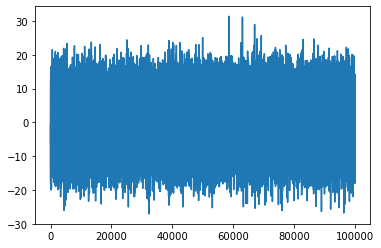

In [5]:
plt.plot(y)

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

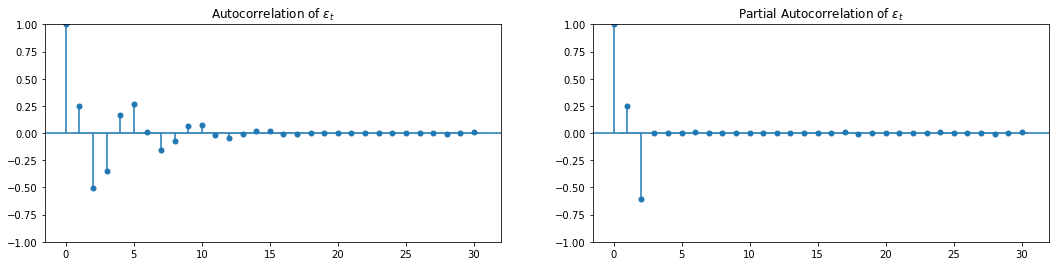

In [14]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

# Plot ACF on the first subplot
plot_acf(epsilon, lags=30, ax = axes[0])
plot_pacf(epsilon, lags=30, ax = axes[1], method='ywm')
axes[0].set_title('Autocorrelation of $\epsilon_t$')
axes[1].set_title('Partial Autocorrelation of $\epsilon_t$')
plt.show()
fig.savefig('ar2_linear_mdl_acf_pacf.pdf', bbox_inches='tight', dpi=2000)

### Sanity check using one chunk:

In [8]:
j = 1
tmin = j*10**4
tmax = (j+1)*10**4
n_chains = 1
n_iter = 10**3

#### Power = 1:

In [9]:
m = 1
data = dict(K=tmax-tmin, p=p, m=m, y=y[tmin:tmax], X=X[tmin:tmax].transpose())
start = time()
fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=n_iter)
print(round((time()-start)/60,2), "minutes to run")
trace = fit.extract()


Gradient evaluation took 0.017932 seconds
1000 transitions using 10 leapfrog steps per transition would take 179.32 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 2075.13 seconds (Warm-up)
               343.596 seconds (Sampling)
               2418.73 seconds (Total)

40.21 minutes to run


In [10]:
alpha_CI = np.percentile(trace['alpha'], [5,95])
beta_CI = np.percentile(trace['beta'], [2.5,97.5], axis=0)
CI_contains = (beta_CI[0]<beta)*(beta<beta_CI[1])
print("Beta CI coverage =", np.mean(CI_contains)*100, "%")
print("Beta CI average length =", np.mean(np.abs(beta_CI[1]-beta_CI[0])))
phi_CI = np.percentile(trace['phi'], [2.7,97.5], axis=0)
CI_contains = (phi_CI[0]<phi)*(phi<phi_CI[1])
print(CI_contains)

Beta CI coverage = 100.0 %
Beta CI average length = 36.843159333620875
[False False]


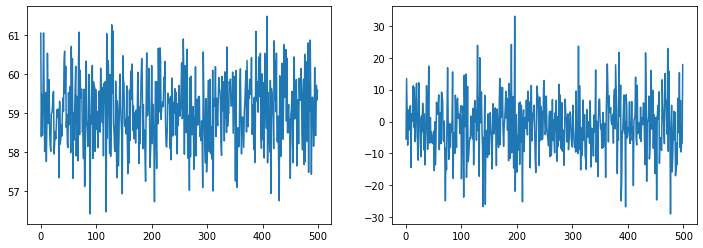

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(trace['sigmasq'])
plt.subplot(122)
plt.plot(trace['beta'][:,1])

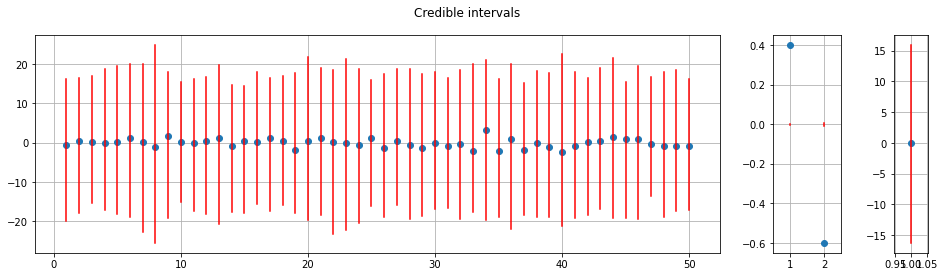

In [16]:
f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [10, 1, 0.5]}, figsize=(16,4))
a0.plot(np.arange(1,p+1), beta, "o")
for i in range(p) :
    a0.plot([i+1,i+1], beta_CI[:,i], "r-")
    a0.grid(True)
a1.plot(np.arange(1,3),phi, "o")
for i in range(len(phi)) :
    a1.plot([i+1,i+1], phi_CI[:,i], "r-")
    a1.grid(True)
a1.set_xlim([1/2,len(phi)+1/2])
a2.plot(1, alpha, "o")
a2.plot([1,1], alpha_CI, "r-")
a2.grid(True)
plt.suptitle("Credible intervals");

#### Correct power:

In [17]:
m = T/(tmax-tmin)
data = dict(K=tmax-tmin, p=p, m=m, y=y[tmin:tmax], X=X[tmin:tmax].transpose())
start = time()
fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=n_iter)
print(round((time()-start)/60,2), "minutes to run")
trace = fit.extract()


Gradient evaluation took 0.082256 seconds
1000 transitions using 10 leapfrog steps per transition would take 822.56 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 2254.2 seconds (Warm-up)
               537.703 seconds (Sampling)
               2791.9 seconds (Total)

46.5 minutes to run


In [18]:
alpha_CI = np.percentile(trace['alpha'], [5,95])
beta_CI = np.percentile(trace['beta'], [2.5,97.5], axis=0)
CI_contains = (beta_CI[0]<beta)*(beta<beta_CI[1])
print("Beta CI coverage =", np.mean(CI_contains)*100, "%")
print("Beta CI average length =", np.mean(np.abs(beta_CI[1]-beta_CI[0])))
phi_CI = np.percentile(trace['phi'], [2.7,97.5], axis=0)
CI_contains = (phi_CI[0]<phi)*(phi<phi_CI[1])
print(CI_contains)

Beta CI coverage = 40.0 %
Beta CI average length = 10.086514048584807
[False False]


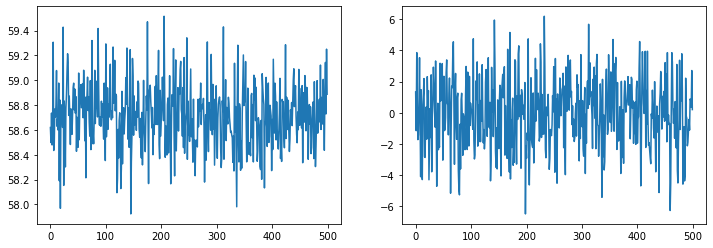

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(trace['sigmasq'])
plt.subplot(122)
plt.plot(trace['beta'][:,1])

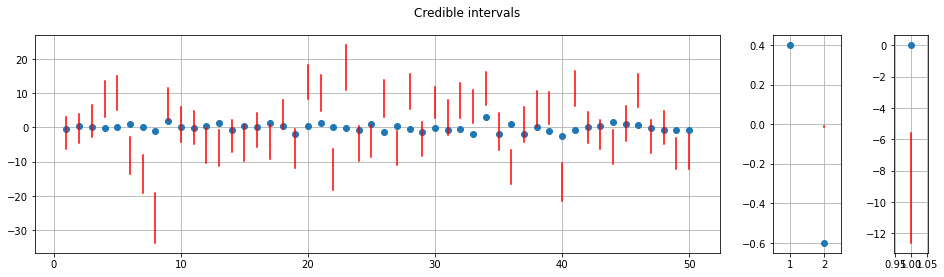

In [20]:
f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [10, 1, 0.5]}, figsize=(16,4))
a0.plot(np.arange(1,p+1), beta, "o")
for i in range(p) :
    a0.plot([i+1,i+1], beta_CI[:,i], "r-")
    a0.grid(True)
a1.plot(np.arange(1,3),phi, "o")
for i in range(len(phi)) :
    a1.plot([i+1,i+1], phi_CI[:,i], "r-")
    a1.grid(True)
a1.set_xlim([1/2,len(phi)+1/2])
a2.plot(1, alpha, "o")
a2.plot([1,1], alpha_CI, "r-")
a2.grid(True)
plt.suptitle("Credible intervals");

### Divide and conquer:

In [21]:
m = 10.
tstart = np.arange(m).astype(int)
tend = 1 + tstart
tstart *= int(T/m)
tend *= int(T/m)

n_chains = 10
n_iter = 10**3
beta_vals_1 = np.zeros((int(m),int(n_chains*n_iter/2),p))
for i in range(int(m)) :
    tmin, tmax = tstart[i], tend[i]
    data = dict(K=tmax-tmin, p=p, m=m, y=y[tmin:tmax], X=X[tmin:tmax].transpose())
    fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=n_iter)
    trace = fit.extract()
    beta_vals_1[i] = trace['beta'] 


Gradient evaluation took 0.053763 seconds
1000 transitions using 10 leapfrog steps per transition would take 537.63 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.056799 seconds
1000 transitions using 10 leapfrog steps per transition would take 567.99 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.059358 seconds
1000 transitions using 10 leapfrog steps per transition would take 593.58 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.063039 seconds
1000 transitions using 10 leapfrog steps per transition would take 630.39 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.061934 seconds
1000 transitions using 10 leapfrog steps per transition would take 619.34 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.063513 seconds
1000 transitions using 10 leapfrog steps per transition would take 635.13 seconds.
Adjust your expectations accordingly!



Gra


 Elapsed Time: 3288.44 seconds (Warm-up)
               581.095 seconds (Sampling)
               3869.53 seconds (Total)


Gradient evaluation took 0.044442 seconds
1000 transitions using 10 leapfrog steps per transition would take 444.42 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.055991 seconds
1000 transitions using 10 leapfrog steps per transition would take 559.91 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.054151 seconds
1000 transitions using 10 leapfrog steps per transition would take 541.51 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.056467 seconds
1000 transitions using 10 leapfrog steps per transition would take 564.67 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.055664 seconds
1000 transitions using 10 leapfrog steps per transition would take 556.64 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.062726 seconds
100


 Elapsed Time: 4108.08 seconds (Warm-up)
               629.736 seconds (Sampling)
               4737.82 seconds (Total)


Gradient evaluation took 0.054244 seconds
1000 transitions using 10 leapfrog steps per transition would take 542.44 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.050991 seconds
1000 transitions using 10 leapfrog steps per transition would take 509.91 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.053449 seconds
1000 transitions using 10 leapfrog steps per transition would take 534.49 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.056269 seconds
1000 transitions using 10 leapfrog steps per transition would take 562.69 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.060265 seconds
1000 transitions using 10 leapfrog steps per transition would take 602.65 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.0602 seconds
1000 


 Elapsed Time: 6361.76 seconds (Warm-up)
               970.581 seconds (Sampling)
               7332.35 seconds (Total)


Gradient evaluation took 0.052265 seconds
1000 transitions using 10 leapfrog steps per transition would take 522.65 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.053548 seconds
1000 transitions using 10 leapfrog steps per transition would take 535.48 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.047778 seconds
1000 transitions using 10 leapfrog steps per transition would take 477.78 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.057212 seconds
1000 transitions using 10 leapfrog steps per transition would take 572.12 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.056823 seconds
1000 transitions using 10 leapfrog steps per transition would take 568.23 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.057366 seconds
100


 Elapsed Time: 4915.62 seconds (Warm-up)
               895.24 seconds (Sampling)
               5810.86 seconds (Total)


Gradient evaluation took 0.051924 seconds
1000 transitions using 10 leapfrog steps per transition would take 519.24 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.049977 seconds
1000 transitions using 10 leapfrog steps per transition would take 499.77 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.051704 seconds
1000 transitions using 10 leapfrog steps per transition would take 517.04 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.052303 seconds
1000 transitions using 10 leapfrog steps per transition would take 523.03 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.057555 seconds
1000 transitions using 10 leapfrog steps per transition would take 575.55 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.058941 seconds
1000


 Elapsed Time: 2818.53 seconds (Warm-up)
               539.682 seconds (Sampling)
               3358.21 seconds (Total)


Gradient evaluation took 0.052258 seconds
1000 transitions using 10 leapfrog steps per transition would take 522.58 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.04942 seconds
1000 transitions using 10 leapfrog steps per transition would take 494.2 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.052304 seconds
1000 transitions using 10 leapfrog steps per transition would take 523.04 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.058422 seconds
1000 transitions using 10 leapfrog steps per transition would take 584.22 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.062809 seconds
1000 transitions using 10 leapfrog steps per transition would take 628.09 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.062229 seconds
1000 

Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 300 / 10

Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 876.927 seconds (Warm-up)
               161.422 seconds (Sampling)
               1038.35 seconds (Total)

Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 917.304 seconds (Warm-up)
               168.439 seconds (Sampling)
               1085.74 se


 Elapsed Time: 5566.75 seconds (Warm-up)
               876.385 seconds (Sampling)
               6443.13 seconds (Total)


Gradient evaluation took 0.049435 seconds
1000 transitions using 10 leapfrog steps per transition would take 494.35 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.050251 seconds
1000 transitions using 10 leapfrog steps per transition would take 502.51 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.05422 seconds
1000 transitions using 10 leapfrog steps per transition would take 542.2 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.056224 seconds
1000 transitions using 10 leapfrog steps per transition would take 562.24 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.053871 seconds
1000 transitions using 10 leapfrog steps per transition would take 538.71 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.059581 seconds
1000 


 Elapsed Time: 3106.24 seconds (Warm-up)
               580.05 seconds (Sampling)
               3686.29 seconds (Total)


Gradient evaluation took 0.060489 seconds
1000 transitions using 10 leapfrog steps per transition would take 604.89 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.061113 seconds
1000 transitions using 10 leapfrog steps per transition would take 611.13 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.061525 seconds
1000 transitions using 10 leapfrog steps per transition would take 615.25 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.06455 seconds
1000 transitions using 10 leapfrog steps per transition would take 645.5 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.070197 seconds
1000 transitions using 10 leapfrog steps per transition would take 701.97 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.074405 seconds
1000 t


 Elapsed Time: 3452.12 seconds (Warm-up)
               583.569 seconds (Sampling)
               4035.69 seconds (Total)



In [ ]:
m = 20.
tstart = np.arange(m).astype(int)
tend = 1 + tstart
tstart *= int(T/m)
tend *= int(T/m)

n_chains = 10
n_iter = 10**3
beta_vals_2 = np.zeros((int(m),int(n_chains*n_iter/2),p))
for i in range(int(m)) :
    tmin, tmax = tstart[i], tend[i]
    data = dict(K=tmax-tmin, p=p, m=m, y=y[tmin:tmax], X=X[tmin:tmax].transpose())
    fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=n_iter)
    trace = fit.extract()
    beta_vals_2[i] = trace['beta'] 
np.save('/xtmp/DC-BATS_data/ar(2)_errors/beta_vals_1.npy', beta_vals_1)
np.save('/xtmp/DC-BATS_data/ar(2)_errors/beta_vals_2.npy', beta_vals_2)


Gradient evaluation took 0.040857 seconds
1000 transitions using 10 leapfrog steps per transition would take 408.57 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.037437 seconds
1000 transitions using 10 leapfrog steps per transition would take 374.37 seconds.
Adjust your expectations accordingly!




Gradient evaluation took 0.045619 seconds
1000 transitions using 10 leapfrog steps per transition would take 456.19 seconds.
Gradient evaluation took 0.043018 seconds
Adjust your expectations accordingly!


1000 transitions using 10 leapfrog steps per transition would take 430.18 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.04171 seconds
1000 transitions using 10 leapfrog steps per transition would take 417.1 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.032126 seconds
1000 transitions using 10 leapfrog steps per transition would take 321.26 seconds.
Adjust your expectations accordingly!



Gradi

Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 200 / 


 Elapsed Time: 1889.32 seconds (Warm-up)
               347.075 seconds (Sampling)
               2236.39 seconds (Total)


Gradient evaluation took 0.032103 seconds
1000 transitions using 10 leapfrog steps per transition would take 321.03 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.029997 seconds
1000 transitions using 10 leapfrog steps per transition would take 299.97 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.037314 seconds
1000 transitions using 10 leapfrog steps per transition would take 373.14 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.035134 seconds
1000 transitions using 10 leapfrog steps per transition would take 351.34 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.038966 seconds
1000 transitions using 10 leapfrog steps per transition would take 389.66 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.031904 seconds
100


 Elapsed Time: 1764.43 seconds (Warm-up)
               327.194 seconds (Sampling)
               2091.63 seconds (Total)


Gradient evaluation took 0.035731 seconds
1000 transitions using 10 leapfrog steps per transition would take 357.31 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.036739 seconds
1000 transitions using 10 leapfrog steps per transition would take 367.39 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.035298 seconds
1000 transitions using 10 leapfrog steps per transition would take 352.98 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.036457 seconds
1000 transitions using 10 leapfrog steps per transition would take 364.57 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.036591 seconds
1000 transitions using 10 leapfrog steps per transition would take 365.91 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.03387 seconds
1000


 Elapsed Time: 2237.87 seconds (Warm-up)
               334.248 seconds (Sampling)
               2572.11 seconds (Total)







Gradient evaluation took 0.052325 seconds
1000 transitions using 10 leapfrog steps per transition would take 523.25 seconds.
Adjust your expectations accordingly!


Gradient evaluation took 0.043988 seconds
Gradient evaluation took 0.049969 seconds
Gradient evaluation took 0.042283 seconds
1000 transitions using 10 leapfrog steps per transition would take 439.88 seconds.
Adjust your expectations accordingly!
1000 transitions using 10 leapfrog steps per transition would take 422.83 seconds.

Adjust your expectations accordingly!


Gradient evaluation took 0.036211 seconds

Gradient evaluation took 0.04735 seconds
1000 transitions using 10 leapfrog steps per transition would take 362.11 seconds.
Adjust your expectations accordingly!
1000 transitions using 10 leapfrog steps per transition would take 473.5 seconds.
Adjust your expectations accordingly!

1000 tra




Gradient evaluation took 0.043926 seconds
Gradient evaluation took 0.040327 seconds
Gradient evaluation took 0.046127 seconds
1000 transitions using 10 leapfrog steps per transition would take 461.27 seconds.
Adjust your expectations accordingly!
1000 transitions using 10 leapfrog steps per transition would take 439.26 seconds.

Adjust your expectations accordingly!



1000 transitions using 10 leapfrog steps per transition would take 403.27 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.050177 seconds
1000 transitions using 10 leapfrog steps per transition would take 501.77 seconds.
Adjust your expectations accordingly!




Gradient evaluation took 0.054137 seconds
1000 transitions using 10 leapfrog steps per transition would take 541.37 seconds.
Adjust your expectations accordingly!


Gradient evaluation took 0.055526 seconds
1000 transitions using 10 leapfrog steps per transition would take 555.26 seconds.
Adjust your expectations accordingly!





G


 Elapsed Time: 2708.68 seconds (Warm-up)
               404.226 seconds (Sampling)
               3112.91 seconds (Total)


Gradient evaluation took 0.039348 seconds
1000 transitions using 10 leapfrog steps per transition would take 393.48 seconds.
Adjust your expectations accordingly!




Gradient evaluation took 0.044759 seconds
1000 transitions using 10 leapfrog steps per transition would take 447.59 seconds.
Adjust your expectations accordingly!


Gradient evaluation took 0.037568 seconds
1000 transitions using 10 leapfrog steps per transition would take 375.68 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.035452 seconds

1000 transitions using 10 leapfrog steps per transition would take 354.52 seconds.
Adjust your expectations accordingly!




Gradient evaluation took 0.046172 seconds
1000 transitions using 10 leapfrog steps per transition would take 461.72 seconds.
Adjust your expectations accordingly!


Gradient evaluation took 0.030484 seconds
10



Gradient evaluation took 0.072364 seconds
1000 transitions using 10 leapfrog steps per transition would take 723.64 seconds.
Gradient evaluation took 0.065417 seconds
Adjust your expectations accordingly!


1000 transitions using 10 leapfrog steps per transition would take 654.17 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.058331 seconds
1000 transitions using 10 leapfrog steps per transition would take 583.31 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.053774 seconds
1000 transitions using 10 leapfrog steps per transition would take 537.74 seconds.
Adjust your expectations accordingly!




Gradient evaluation took 0.075336 seconds
1000 transitions using 10 leapfrog steps per transition would take 753.36 seconds.
Adjust your expectations accordingly!


Gradient evaluation took 0.068273 seconds
1000 transitions using 10 leapfrog steps per transition would take 682.73 seconds.
Adjust your expectations accordingly!



Gra

In [ ]:
np.shape(beta_vals_1)

In [ ]:
beta_CI_1 = np.zeros((p,2,10))
for i in range(p) :
    beta_CI_1[i] = np.percentile(beta_vals_1[:,:,i],axis=1,q=[2.5,97.5])
beta_CI_2 = np.zeros((p,2,20))
for i in range(p) :
    beta_CI_2[i] = np.percentile(beta_vals_2[:,:,i],axis=1,q=[2.5,97.5])

In [ ]:
beta_ci_1 = np.mean(beta_CI_1,-1)
beta_ci_2 = np.mean(beta_CI_2,-1)

In [ ]:
np.shape(beta_ci_1)

In [ ]:
np.mean(beta_ci_1[:,1]-beta_ci_1[:,0])
np.mean(beta_ci_2[:,1]-beta_ci_2[:,0])

In [ ]:
print("Beta CI average length: m = 10, length =", np.mean(beta_ci_1[:,1]-beta_ci_1[:,0]), 
      "; m = 20, length =", np.mean(beta_ci_2[:,1]-beta_ci_2[:,0]))

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.subplot(121)
plt.plot(np.arange(1,p+1), beta, "o")
for i in range(p) :
    plt.plot([i+1,i+1], beta_ci_1[i], "r-")
plt.grid(True)
plt.xlabel(r"$\beta$ index", fontsize=12)
plt.ylabel(r"$\beta$", fontsize=12)
plt.title(r"$m=10$")
plt.subplot(122)
plt.plot(np.arange(1,p+1), beta, "o")
for i in range(p) :
    plt.plot([i+1,i+1], beta_ci_2[i], "r-")
plt.grid(True)
plt.title(r"$m=20$")
plt.xlabel(r"$\beta$ index", fontsize=12)
plt.ylabel(r"$\beta$", fontsize=12)
plt.suptitle(r"Credible intervals for $\beta$ using divide-and-conquer", fontsize=14);

### Full posterior:

In [ ]:
data = dict(K=T, p=p, m=1, y=y, X=X.transpose())
start = time()
fit_full = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=n_iter)
print(round((time()-start)/60,2), "minutes to run")
trace_full = fit_full.extract()
np.save('/xtmp/DC-BATS_data/ar(2)_errors/beta_full.npy', trace_full['beta'])

In [ ]:
alpha_CI = np.percentile(trace_full['alpha'], [5,95])
beta_CI = np.percentile(trace_full['beta'], [2.5,97.5], axis=0)
CI_contains = (beta_CI[0]<beta)*(beta<beta_CI[1])
print("Beta CI coverage =", np.mean(CI_contains)*100, "%")
print("Beta CI average length =", np.mean(np.abs(beta_CI[1]-beta_CI[0])))
phi_CI = np.percentile(trace_full['phi'], [2.7,97.5], axis=0)
CI_contains = (phi_CI[0]<phi)*(phi<phi_CI[1])
print(CI_contains)

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(trace_full['sigmasq'])
plt.subplot(122)
plt.plot(trace_full['beta'][:,1])

In [ ]:
f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [10, 1, 0.5]}, figsize=(16,4))
a0.plot(np.arange(1,p+1), beta, "o")
for i in range(p) :
    a0.plot([i+1,i+1], beta_CI[:,i], "r-")
    a0.grid(True)
a1.plot(np.arange(1,3),phi, "o")
for i in range(len(phi)) :
    a1.plot([i+1,i+1], phi_CI[:,i], "r-")
    a1.grid(True)
a1.set_xlim([1/2,len(phi)+1/2])
a2.plot(1, alpha, "o")
a2.plot([1,1], alpha_CI, "r-")
a2.grid(True)
plt.suptitle("Credible intervals");

In [ ]:
fig = plt.figure(figsize=(16,3.5))
plt.subplot(131)
plt.plot(np.arange(1,p+1), beta, "o")
for i in range(p) :
    plt.plot([i+1,i+1], beta_ci_1[i], "r-")
plt.grid(True)
plt.xlabel(r"$\beta$ index", fontsize=12)
plt.ylabel(r"$\beta$", fontsize=12)
plt.title(r"Averaging $m=10$ subposteriors")
plt.text(x=25, y=0.29, s=r"Credible intervals for $\beta$ using divide-and-conquer", fontsize=13)
plt.subplot(132)
plt.plot(np.arange(1,p+1), beta, "o")
for i in range(p) :
    plt.plot([i+1,i+1], beta_ci_2[i], "r-")
plt.grid(True)
plt.yticks(alpha=0)
plt.title(r"Averaging $m=20$ subposteriors")
plt.xlabel(r"$\beta$ index", fontsize=12)
# plt.suptitle(r"Credible intervals for $\beta$ using divide-and-conquer", fontsize=14)
plt.subplot(133)
plt.plot(np.arange(1,p+1), beta, "o")
for i in range(p) :
    plt.plot([i+1,i+1], beta_CI[:,i], "r-")
    plt.grid(True)
plt.title("Credible intervals for full posterior")
plt.yticks(alpha=0)
plt.xlabel(r"$\beta$ index", fontsize=12)
plt.subplots_adjust(wspace=1e-2)
fig.savefig('CI_ar(2)_errors.pdf', bbox_inches='tight', dpi=2000)